<a href="https://colab.research.google.com/github/RMartinod/Computer-Graphics-Using-Python/blob/main/Ch04_Translation_in_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Local Coordinate (LC) in homogeneous system in 2D at the point of origin pi=〈6,5,1〉.**


In [3]:
import numpy as np
import plotly.express as px
pi = [6,5,1]
LC = np.array([[1, 0, pi[0]],
               [0, 1, pi[1]],
               [0, 0, pi[2]]])
fig = px.line(x=[LC[0,0]+LC[0,2], LC[0,2], LC[0,1]+LC[0,2]],
              y=[LC[1,0]+LC[1,2], LC[1,2], LC[1,1]+LC[1,2]])
fig.update_traces(line_color='red',line_width=4)
fig.show()

**Translation transformation of the Local Coordinate (LC1) with a displacement of 4 units on the x-axis and 7 units on the y-axis, obtaining the Local Coordinate (LC2).**

In [2]:
import numpy as np, plotly.express as px
pi = [4,7,1]
Dp = [3,2,1]
LC1 = np.array([[1, 0, pi[0]],
                [0, 1, pi[1]],
                [0, 0, pi[2]]])
TM = np.array([[1, 0, Dp[0]],
               [0, 1, Dp[1]],
               [0, 0, Dp[2]]])
LC2 = TM@LC1
fig = px.line(x=[LC1[0,0]+LC1[0,2], LC1[0,2], LC1[0,1]+LC1[0,2]],
              y=[LC1[1,0]+LC1[1,2], LC1[1,2], LC1[1,1]+LC1[1,2]])
fig.add_trace(px.line(x=[LC2[0,0]+LC2[0,2], LC2[0,2], LC2[0,1]+LC2[0,2]],
                      y=[LC2[1,0]+LC2[1,2], LC2[1,2], LC2[1,1]+LC2[1,2]]).data[0])
fig.update_traces(line_color='red',line_width=4)

**Translation transformation of the curve (C_1) with a displacement of 5 units on the x-axis and 3 units on the y-axis, obtaining the curve (C_1).**

In [3]:
import numpy as np, plotly.express as px
u = np.linspace(0,2*np.pi,200)
r = 1.5 + np.sin(6*u)
x = r * np.cos(u)
y = r * np.sin(u)
C1 = np.array([x,y,np.ones(len(x))])
Dp = [5,3,1]
TM = np.array([[1, 0, Dp[0]],
               [0, 1, Dp[1]],
               [0, 0, Dp[2]]])
C2 = TM@C1
fig = px.line(x=C1[0,:],y=C1[1,:])
fig.add_trace(px.line(x=C2[0,:],y=C2[1,:]).data[0])
fig.update_traces(line_color='black',line_width=4)
fig.update_layout(title='Flowers',autosize=False)

**Simple way to quickly create and plot a 2D surface (S) from the X and Y arrays.**

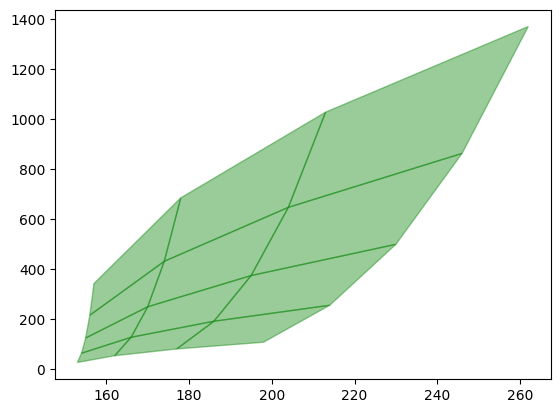

In [ ]:
import numpy as np, matplotlib.pyplot as plt
u = np.linspace(1,4,4)
v = np.linspace(3,7,5)
U,V = np.meshgrid(u,v)
X = U**2 * V + 150
Y = U * V**3
m,n = np.shape(X)
for row in range(m-1):
  for col in range(n-1):
    plt.fill([X[row,col],X[row+1,col],X[row+1,col+1],X[row,col+1]],
             [Y[row,col],Y[row+1,col],Y[row+1,col+1],Y[row,col+1]],
              color='green',alpha=.4)

**Change of the X and Y arrays representation of the surface to the representation using the S array form, i.e., the array packing process.**

In [1]:
import numpy as np
X = np.array([[1.0,1.3,1.5,1.9],[2.1,2.2,2.5,2.6],[0.5,0.4,0.3,0.2]])
Y = np.array([[5.5,5.4,5.2,5.0],[7.2,7.5,7.7,7.9],[9.2,9.3,9.5,9.6]])
m,n = np.shape(X)
S = np.ones((3,m*n))
for row in range(m):
  S[0:2,row*n:(row+1)*n] = [X[row,:],Y[row,:]]
print('X: ',X)
print('Y: ',Y)
print('S: ',S)

X:  [[1.  1.3 1.5 1.9]
 [2.1 2.2 2.5 2.6]
 [0.5 0.4 0.3 0.2]]
Y:  [[5.5 5.4 5.2 5. ]
 [7.2 7.5 7.7 7.9]
 [9.2 9.3 9.5 9.6]]
S:  [[1.  1.3 1.5 1.9 2.1 2.2 2.5 2.6 0.5 0.4 0.3 0.2]
 [5.5 5.4 5.2 5.  7.2 7.5 7.7 7.9 9.2 9.3 9.5 9.6]
 [1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]]


**Surface (S1) translation with a displacement of -100 units on the x-axis and 500 units on the y-axis, obtaining the curve (S2).**

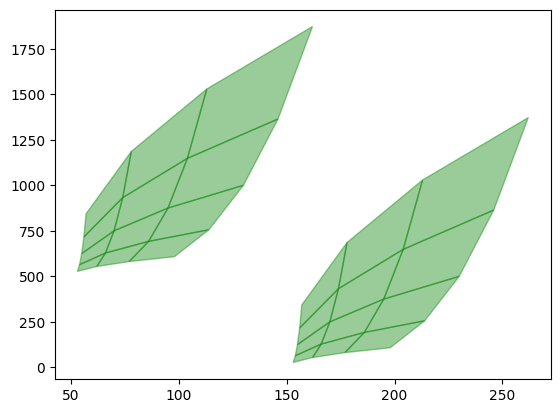

In [ ]:
import numpy as np, matplotlib.pyplot as plt
u = np.linspace(1,4,4)
v = np.linspace(3,7,5)
U,V = np.meshgrid(u,v)
X = U**2 * V + 150
Y = U * V**3
m,n = np.shape(X)
S1 = np.ones((3,m*n))
for row in range(m):
  S1[0:2,row*n:(row+1)*n] = [X[row,:],Y[row,:]]
Dp = [-100,500,1]
TM = np.array([[1, 0, Dp[0]],
               [0, 1, Dp[1]],
               [0, 0, Dp[2]]])
S2 = TM@S1
X2, Y2 = [], []
X2, Y2 = np.zeros((m,n)), np.zeros((m,n))
for row in range(m):
  X2[row,:] = S2[0,row*n:(row+1)*n]
  Y2[row,:] = S2[1,row*n:(row+1)*n]
for row in range(m-1):
  for col in range(n-1):
    plt.fill([X[row,col],X[row+1,col],X[row+1,col+1],X[row,col+1]],
             [Y[row,col],Y[row+1,col],Y[row+1,col+1],Y[row,col+1]],
              color='green',alpha=.4)
    plt.fill([X2[row,col],X2[row+1,col],X2[row+1,col+1],X2[row,col+1]],
             [Y2[row,col],Y2[row+1,col],Y2[row+1,col+1],Y2[row,col+1]],
              color='green',alpha=.4)

**Quick project**

Based on the concepts obtained in translation transformations of surface in 2D, model a simple tessellation with a geometrical figure.


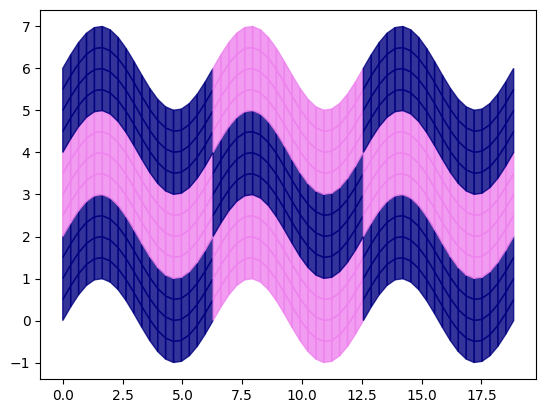

In [ ]:
import numpy as np, matplotlib.pyplot as plt
u   = np.linspace(0,2*np.pi,20)
v   = np.linspace(0,2,5)
U,V = np.meshgrid(u,v)
X   = U
Y   = V + np.sin(U)
m,n = np.shape(X)
S1 = np.ones((3,m*n))
for row in range(m):
  S1[0:2,row*n:(row+1)*n] = [X[row,:],Y[row,:]]
Dp = [[0,2*np.pi,4*np.pi,0,2*np.pi,4*np.pi,0,2*np.pi,4*np.pi],
      [0,0,0,2,2,2,4,4,4],
      [1,1,1,1,1,1,1,1,1]]
colorTile = ['navy','violet','navy','violet','navy','violet','navy','violet','navy']
for tile in range(len(Dp[0])):
  TM = np.array([[1, 0, Dp[0][tile]],
                 [0, 1, Dp[1][tile]],
                 [0, 0, Dp[2][tile]]])
  S2 = TM@S1
  X2, Y2 = np.zeros((m,n)), np.zeros((m,n))
  for row in range(m):
    X2[row,:] = S2[0,row*n:(row+1)*n]
    Y2[row,:] = S2[1,row*n:(row+1)*n]
  for row in range(m-1):
    for col in range(n-1):
      plt.fill([X2[row,col],X2[row+1,col],X2[row+1,col+1],X2[row,col+1]],
               [Y2[row,col],Y2[row+1,col],Y2[row+1,col+1],Y2[row,col+1]],
               color=colorTile[tile],alpha=.8)